This is a fairly short notebook that makes some plots with all three years together


Also, I'm running this in the Python 3.6.3Kernel

In [1]:
#import the stuff
import pandas as pd #dataframes etc
import matplotlib.pyplot as plt #plotting
import numpy as np
from sklearn import preprocessing
from common.utils import TimeSeriesTensor, create_evaluation_df, mape, scale_shrinker

In [2]:
#load the data
df16 = pd.read_csv('../scripts/slimmed_df_LME38_PNA4_2016.csv')
df17 = pd.read_csv('../scripts/slimmed_df_LME38_PNA4_2017.csv')
df18 = pd.read_csv('../scripts/slimmed_df_LME38_PNA4_2018.csv')
#there are many times when the xtal is not fired upon. This means the laser_datetime is NaN, 
#and importantly, the lumi columns: int_deliv_inv_ub and int_record_inv_ub give an erroneous value.


In [3]:
#the data has multiple possible indices. The most important, is to split the data based on the crystal index which is called Unnamed: 0 at the moment.
df_rename16 = df16.rename(columns={'Unnamed: 0':'xtal_idx', 'Unnamed: 1':'dst_idx'})
xtal_groups = df_rename16.groupby(df_rename16.xtal_idx)
xtal_list = df_rename16.xtal_idx.unique()
#the data has multiple possible indices. The most important, is to split the data based on the crystal index which is called Unnamed: 0 at the moment.
df_rename17 = df17.rename(columns={'Unnamed: 0':'xtal_idx', 'Unnamed: 1':'dst_idx'})
xtal_groups = df_rename17.groupby(df_rename17.xtal_idx)
xtal_list = df_rename17.xtal_idx.unique()
#the data has multiple possible indices. The most important, is to split the data based on the crystal index which is called Unnamed: 0 at the moment.
df_rename18 = df18.rename(columns={'Unnamed: 0':'xtal_idx', 'Unnamed: 1':'dst_idx'})
xtal_groups = df_rename18.groupby(df_rename18.xtal_idx)
xtal_list = df_rename18.xtal_idx.unique()


In [4]:
#chew on it
df_slim16 = df_rename16.groupby('xtal_idx').get_group(54000).dropna(subset=['laser_datetime'])
df_slim16.laser_datetime = pd.to_datetime(df_slim16.laser_datetime)
df_slim16 = df_slim16.set_index('laser_datetime')

#chew on it
df_slim17 = df_rename17.groupby('xtal_idx').get_group(54000).dropna(subset=['laser_datetime'])
df_slim17.laser_datetime = pd.to_datetime(df_slim17.laser_datetime)
df_slim17 = df_slim17.set_index('laser_datetime')
#chew on it
df_slim18 = df_rename18.groupby('xtal_idx').get_group(54000).dropna(subset=['laser_datetime'])
df_slim18.laser_datetime = pd.to_datetime(df_slim18.laser_datetime)
df_slim18 = df_slim18.set_index('laser_datetime')


In [5]:
#stitch lumis
df_slim17.int_deliv_inv_ub = df_slim17.int_deliv_inv_ub + df_slim16.int_deliv_inv_ub[-1]
df_slim18.int_deliv_inv_ub = df_slim18.int_deliv_inv_ub + df_slim17.int_deliv_inv_ub[-1]

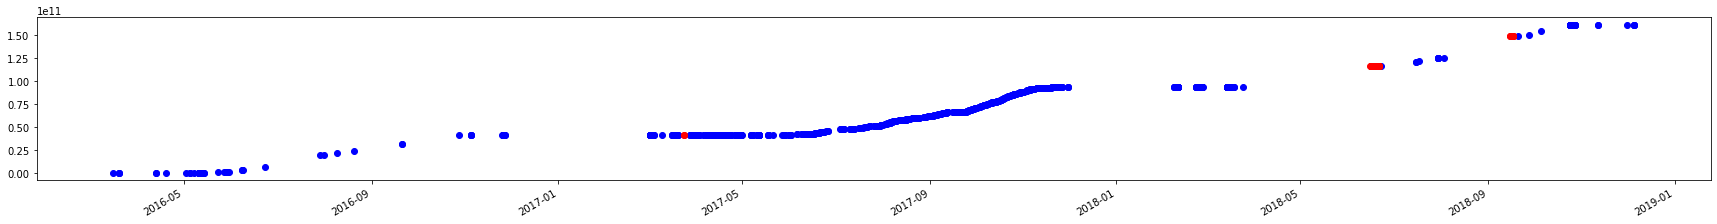

In [6]:
#now we can look at both
fig, ax = plt.subplots(figsize=(30,3))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.scatter(df_slim16[df_slim16.calibration.isna()].index, df_slim16[df_slim16.calibration.isna()].int_deliv_inv_ub, color='blue')
ax.scatter(df_slim16[df_slim16.calibration < 0.5].index,  df_slim16[df_slim16.calibration < 0.5].int_deliv_inv_ub,  color='red')

ax.scatter(df_slim17[df_slim17.calibration.isna()].index, df_slim17[df_slim17.calibration.isna()].int_deliv_inv_ub, color='blue')
ax.scatter(df_slim17[df_slim17.calibration < 0.5].index,  df_slim17[df_slim17.calibration < 0.5].int_deliv_inv_ub,  color='red')

ax.scatter(df_slim18[df_slim18.calibration.isna()].index, df_slim18[df_slim18.calibration.isna()].int_deliv_inv_ub, color='blue')
ax.scatter(df_slim18[df_slim18.calibration < 0.5].index,  df_slim18[df_slim18.calibration < 0.5].int_deliv_inv_ub,  color='red')

In [7]:
#drop low calibration values
df_slim16 = df_slim16.loc[df_slim16.calibration > 0.5]
df_slim17 = df_slim17.loc[df_slim17.calibration > 0.5]
df_slim18 = df_slim18.loc[df_slim18.calibration > 0.5]

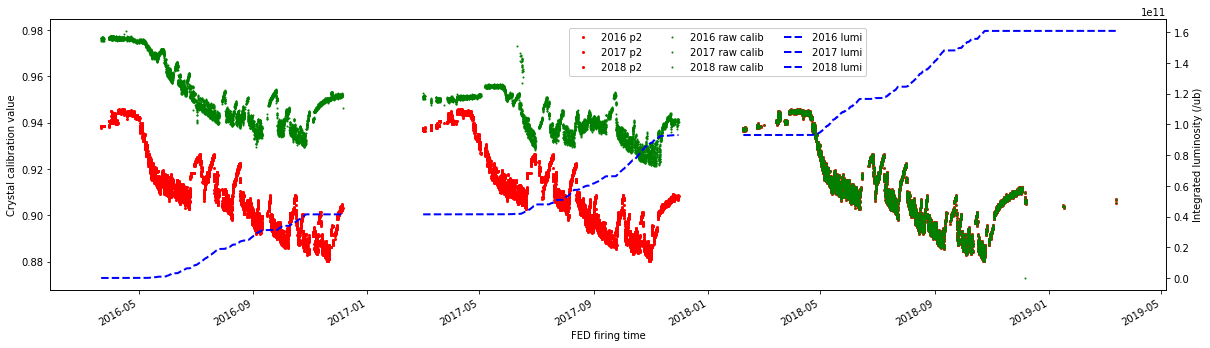

In [8]:
#now lets make a plot of the data
fig, ax1 = plt.subplots(figsize=(20,5))

ax1.set_ylabel('Crystal calibration value')
ax1.set_xlabel('FED firing time')
#ax1.set_ylim([0.87,0.94])
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')

#calibration data
ax1.scatter(df_slim16.index, df_slim16.p2, 
         label='2016 p2', color='red', s=4, linestyle='solid')
ax1.scatter(df_slim17.index, df_slim17.p2, 
         label='2017 p2', color='red', s=4, linestyle='solid')
ax1.scatter(df_slim18.index, df_slim18.p2, 
         label='2018 p2', color='red', s=4, linestyle='solid')

ax1.scatter(df_slim16.index, df_slim16.calibration, 
         label='2016 raw calib', color='green', s=1, linestyle='solid')
ax1.scatter(df_slim17.index, df_slim17.calibration, 
         label='2017 raw calib', color='green', s=1, linestyle='solid')
ax1.scatter(df_slim18.index, df_slim18.calibration, 
         label='2018 raw calib', color='green', s=1, linestyle='solid')




#lumi data on alternate y axis
ax2 = ax1.twinx()
ax2.set_ylabel('Integrated luminosity (/ub)')

ax2.plot(df_slim16.index, df_slim16.int_deliv_inv_ub, 
         label='2016 lumi', color='blue', linewidth=2, linestyle='dashed')
ax2.plot(df_slim17.index, df_slim17.int_deliv_inv_ub, 
         label='2017 lumi', color='blue', linewidth=2, linestyle='dashed')
ax2.plot(df_slim18.index, df_slim18.int_deliv_inv_ub, 
         label='2018 lumi', color='blue', linewidth=2, linestyle='dashed')
#combined legend
fig.legend(ncol=3, loc = (0.47,0.78),framealpha=1)

fig.show()